# Principal component analysis on Iris dataset
### by maryam babaei

### ۱.اضافه کردن کتابخانه های مورد نیاز برای محاسبات ماتریسی و رسم نمودار ها

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### ۲.خواندن داده ها

In [2]:
df = pd.read_csv("iris.csv")

### ۳.مشخص کردن ورودی و تابع هدف و استاندارد کردن ورودی

In [3]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

### ۴. فراخوانی تابع PCA

In [4]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
n=pca.explained_variance_ratio_

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC-1', 'PC-2'])
# Adding lables
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
# Plotting pc1 & pc2

### ۵.رسم نمودار و نمایش خروجی PCA

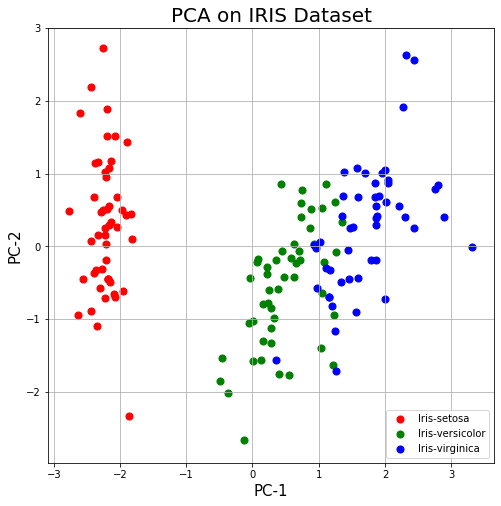

In [6]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC-1', fontsize = 15)
ax.set_ylabel('PC-2', fontsize = 15)
ax.set_title('PCA on IRIS Dataset', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
               , finalDf.loc[indicesToKeep, 'PC-2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()
